## Install package growthrates and the jupyter notebook extension for R

In [22]:
#install.packages('IRkernel')
#IRkernel::installspec()  # to register the kernel in the current R installation
#install.packages("growthrates")
library(growthrates)

## Load the data and create dataframe for each medium

In [56]:
rcm_mgam<-read.table("Data/FECALIBACTERIUM PRAUSNITZII_mGAM_rcm", header = T)
time_temp<-read.table("Data/time_temp", header=T)
library(lubridate)
time<-as.numeric(lubridate::as.difftime(as.character(time_temp[,1])))
rcm_mgam<-cbind(time,rcm_mgam)
head(rcm_mgam)

,time,rcm1,rcm2,rcm3,mgam1,mgam2,mgam3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.066667,0.135,0.158,0.154,0.075,0.068,0.054
2,62.066667,0.176,0.220,0.219,0.094,0.091,0.072
3,122.066667,0.262,0.320,0.281,0.126,0.127,0.097
4,182.066667,0.321,0.390,0.375,0.152,0.157,0.115
5,242.066667,0.400,0.484,0.471,0.170,0.177,0.133
6,302.066667,0.488,0.564,0.579,0.203,0.212,0.180


## Bring data in high format using melt()

In [58]:
library(ggplot2)
library(reshape2)
ggplot2::theme_set(theme_classic())

,time,variable,value
,<dbl>,<fct>,<dbl>
1,2.066667,rcm1,0.135
2,62.066667,rcm1,0.176
3,122.066667,rcm1,0.262
4,182.066667,rcm1,0.321
5,242.066667,rcm1,0.400
6,302.066667,rcm1,0.488


## RCM

,time,variable,value
,<dbl>,<fct>,<dbl>
1,2.066667,rcm1,0.135
2,62.066667,rcm1,0.176
3,122.066667,rcm1,0.262
4,182.066667,rcm1,0.321
5,242.066667,rcm1,0.400
6,302.066667,rcm1,0.488


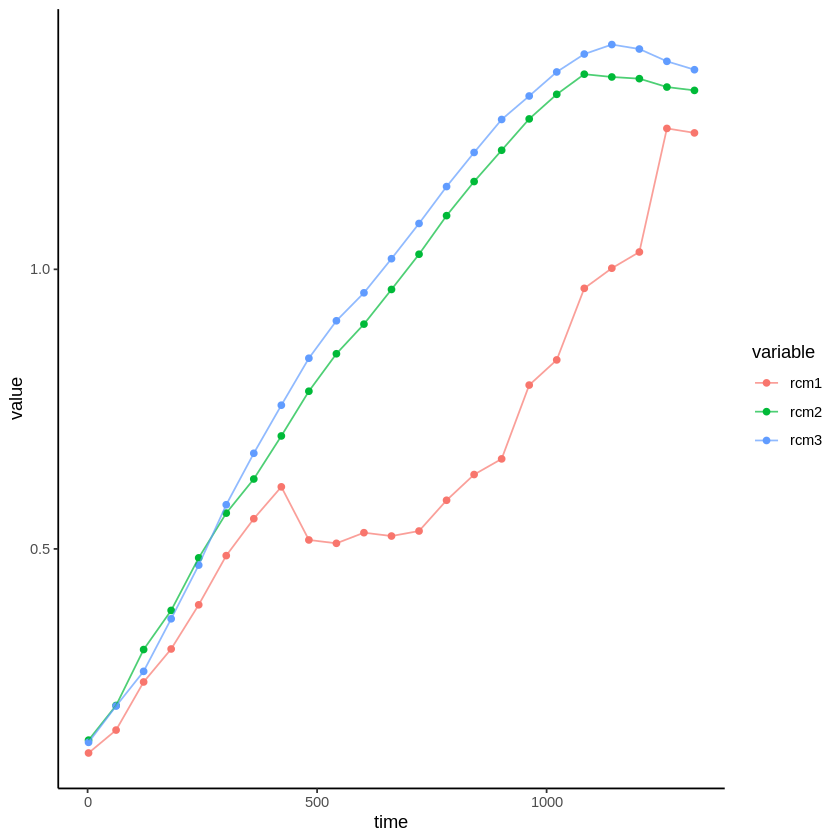

In [73]:
rcm_high <- melt(rcm_mgam[,1:4], id.vars="time")
head(rcm_high)
ggrcm<-ggplot(rcm_high, aes(x = time, y = value, col=variable)) + geom_point()+ geom_line(alpha=0.7)
ggrcm

## MGAM

,time,variable,value
,<dbl>,<fct>,<dbl>
1,2.066667,mgam1,0.075
2,62.066667,mgam1,0.094
3,122.066667,mgam1,0.126
4,182.066667,mgam1,0.152
5,242.066667,mgam1,0.170
6,302.066667,mgam1,0.203


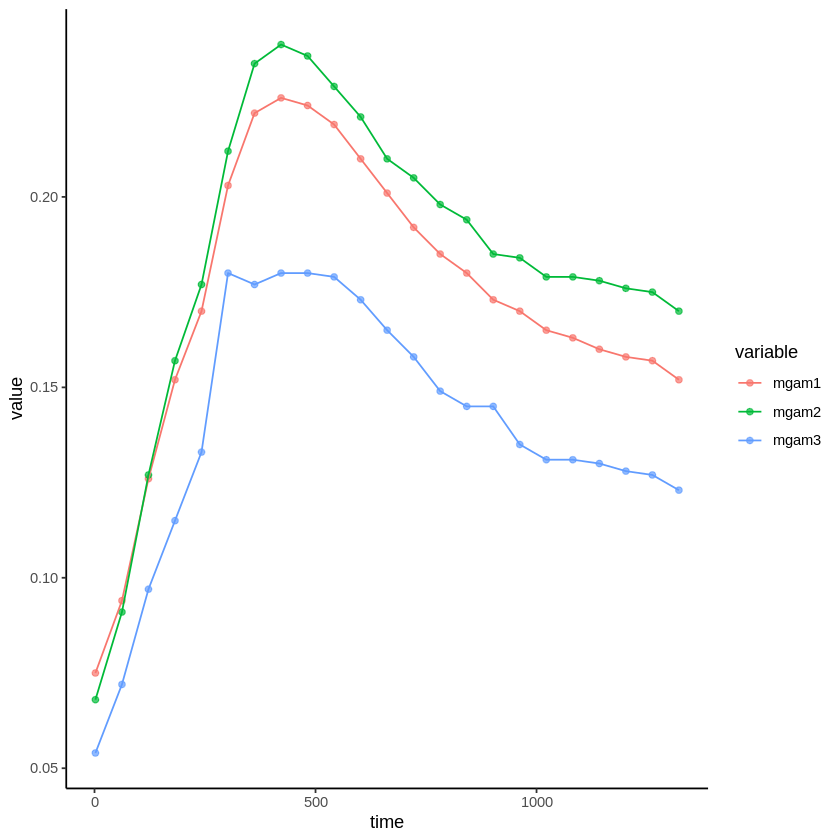

In [74]:
mgam_high <- melt(rcm_mgam[,c(1,5:7)], id.vars="time")
head(mgam_high)
ggrcm<-ggplot(mgam_high, aes(x = time, y = value, col=variable)) + geom_point(alpha=0.7) +geom_line()
ggrcm

## Max Growthrate using Growthrate package

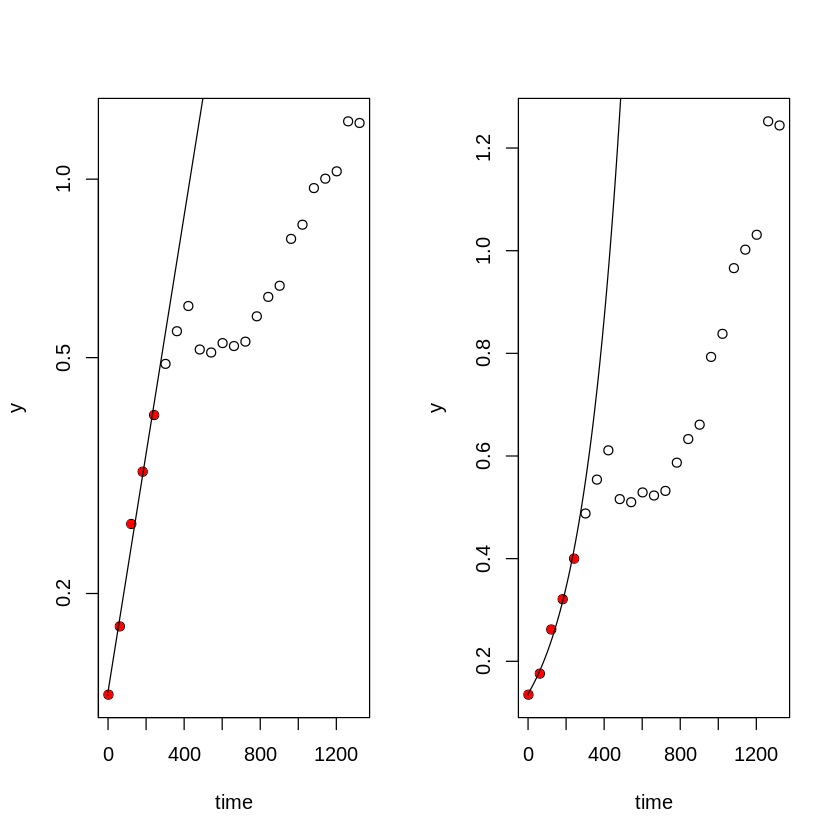

In [81]:
fit <- fit_easylinear(rcm_mgam$time, rcm$rcm1)
par(mfrow = c(1, 2))
plot(fit, log = "y")
plot(fit)

In [48]:
coef(fit)      # exponential growth parameters
mumax<-coef(fit)[3]
rsquared(fit)
mumax  

y0        y0_lm        mumax          lag 
 0.158000000  0.164444184  0.004685832 -8.531286426

## Extension to entire dataset

In [132]:
rcm_mgam_fitted<-apply(rcm_mgam[,2:7],MARGIN=2, function(x) fit_easylinear(rcm_mgam[,1], x))
coef.list<-sapply(rcm_mgam_fitted, function(x) coef(x))
coef.list

,rcm1,rcm2,rcm3,mgam1,mgam2,mgam3
y0,0.135000000,0.158000000,0.154000000,0.075000000,0.068000000,0.054000000
y0_lm,0.136617063,0.164444184,0.158371863,0.076754719,0.070894095,0.056435982
mumax,0.004622228,0.004685832,0.004622775,0.003528677,0.004097784,0.003784994
lag,-2.576046547,-8.531286426,-6.055502862,-6.553946330,-10.171214163,-11.657319220


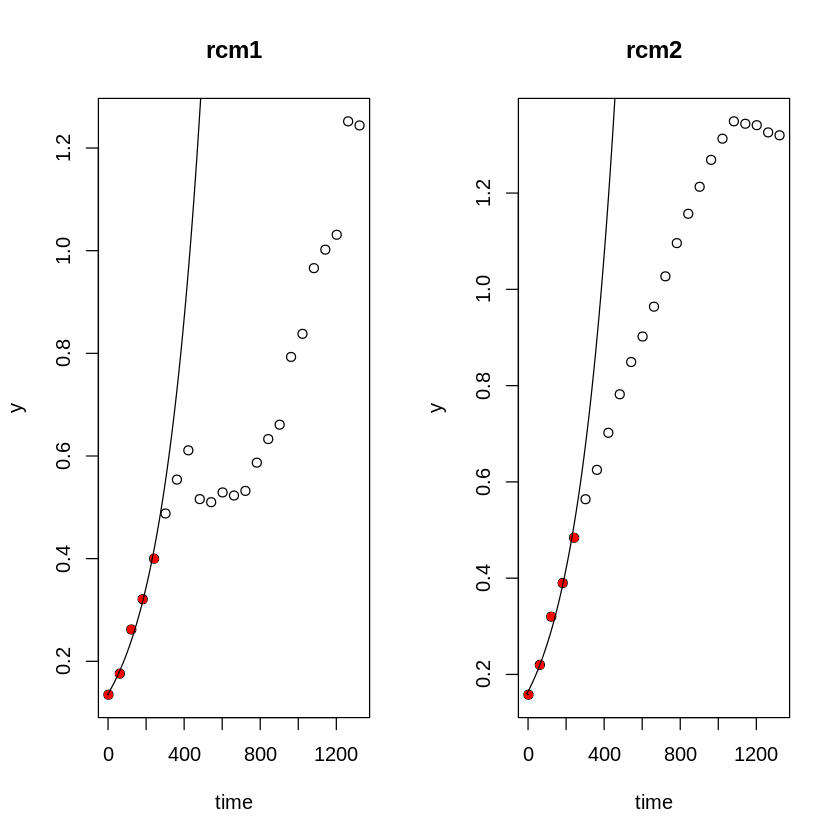

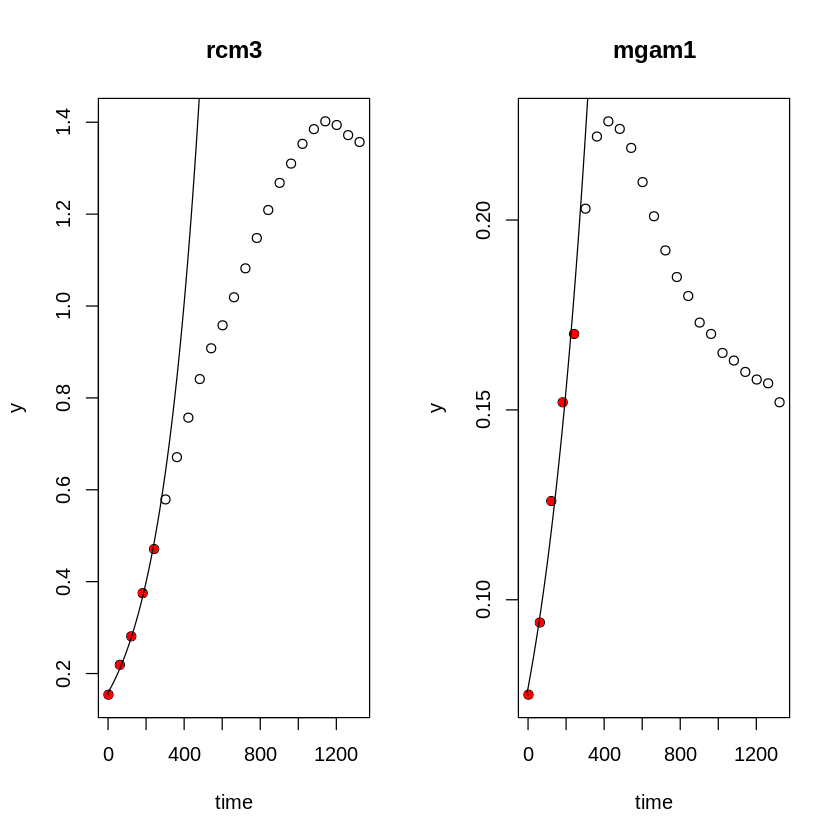

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

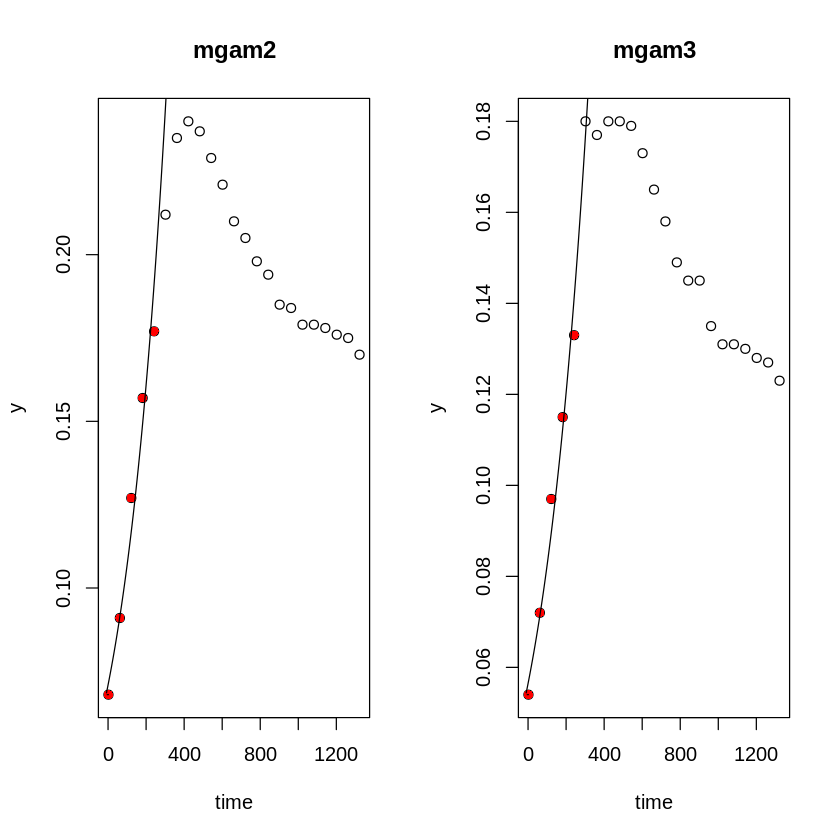

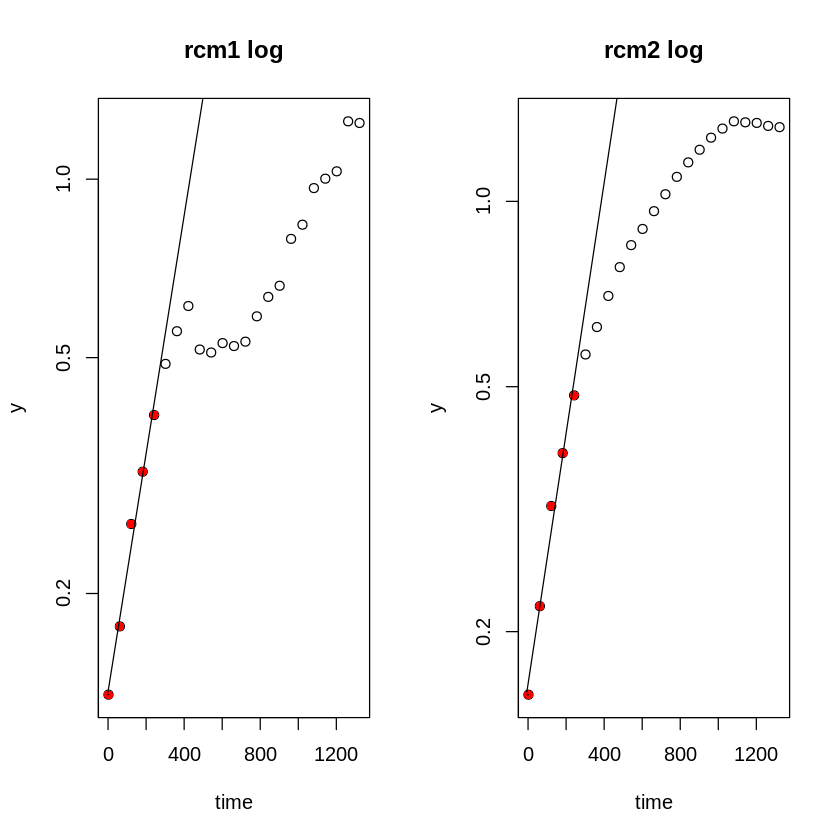

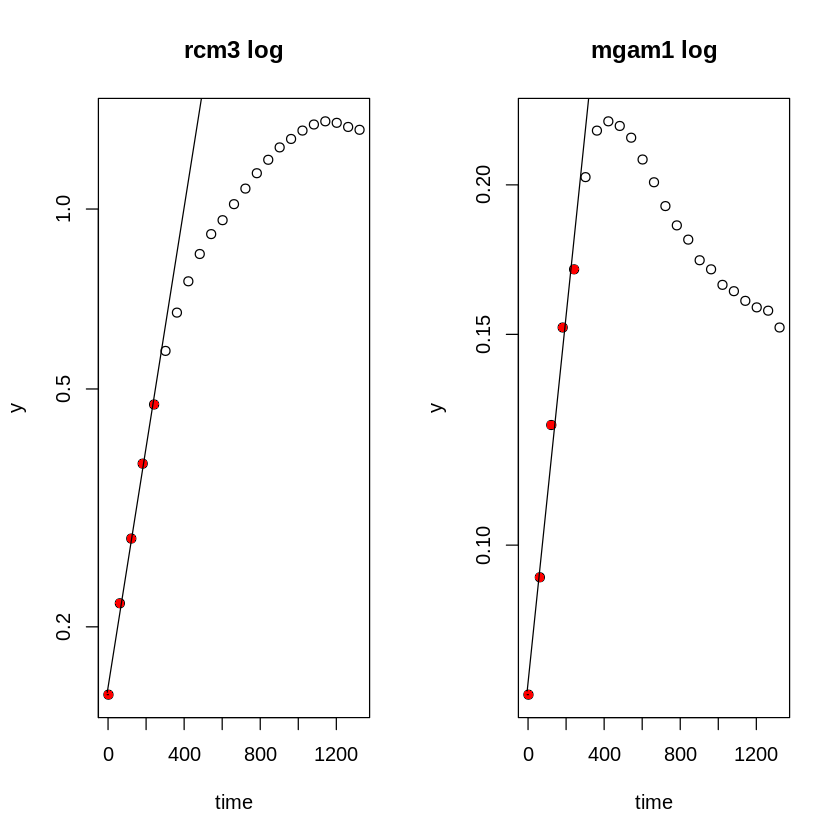

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

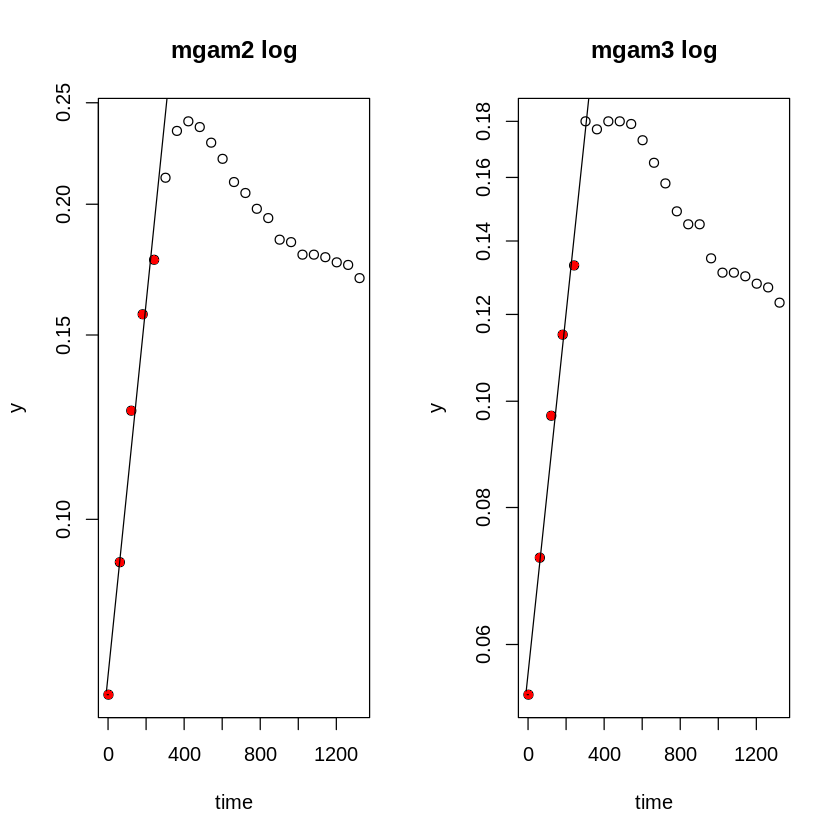

In [177]:
par(mfrow=c(1,2))
lapply(names(rcm_mgam_fitted), function(x) plot(rcm_mgam_fitted[[x]], main=x))
lapply(names(rcm_mgam_fitted), function(x) plot(rcm_mgam_fitted[[x]], log="y", main=paste(x,"log", sep=" ")))